In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.cluster import FeatureAgglomeration as FA
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize



In [4]:
data_set=2

if data_set==1:
   #simulated
    size=200
    dimension=100
    clusters=5
    data_set=[]
    for i in range(size):
        for k in range(clusters):
            mn=(2+k)*np.ones(dimension)
            arr=.1*np.ones(dimension)
            cov=np.diag(arr)
            x=np.random.multivariate_normal(mn, cov, 1)
            temp=x[0].tolist()
            temp.append(k)
            data_set.append(temp)

    df=pd.DataFrame(data=data_set)  
    y=df[dimension]
    X=df.drop(dimension,axis=1)

elif data_set==2:
     #titanic
    df=pd.read_csv("dataSets/titanic.csv")
    del df["PassengerId"]
    del df["Name"]
    del df["Ticket"]
    del df["Cabin"]
    df['Sex']=df['Sex'].replace(to_replace='male',value='1')
    df['Sex']=df['Sex'].replace(to_replace='female',value='0')
    df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
    df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
    df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
    #now with extraneous columns deleted and categorical data data converted to integers, I'll delete all rows with corrupting NaN values
    df=df.dropna()
    df.head()
    y=df['Survived']
    X=df.drop('Survived',axis=1)
elif data_set==3:
    #diabetes
    df=pd.read_csv("dataSets/diabetes.csv")
    zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    for col in zero_to_nan:
            df[col]=df[col].replace(0,np.NaN)
            mean=int(df[col].mean(skipna=True))
            df[col]=df[col].replace(np.NaN,mean)
            X=df.drop('Outcome',axis=1)
            y=df['Outcome']

mms = MinMaxScaler()
mms.fit(X)
scaled_data = mms.transform(X)  

sc=StandardScaler()
sc.fit(X)
scaled_data=sc.transform(X)

Text(0, 0.5, 'Percent of Explained Variance')

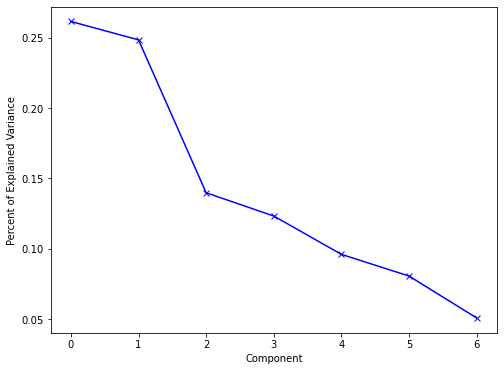

In [5]:
dim=len(scaled_data[0])
pca=PCA(n_components=dim)
pca.fit(scaled_data)

#ICA = FastICA(n_components=2)
#ica_data=ICA.fit_transform(X)


pca_data=pca.transform(scaled_data)
e_v=pca.explained_variance_
pvar=[]
for i in range(dim):
    pvar.append(e_v[i]/sum(e_v))
comp=range(len(e_v))

plt.figure(figsize=(8,6))
plt.plot(comp,pvar,'bx-')
plt.xlabel('Component')
plt.ylabel('Percent of Explained Variance')

Text(0, 0.5, 'Second principle compoennt')

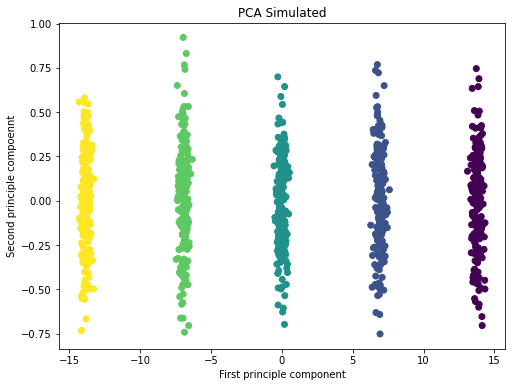

In [138]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=y)
plt.title('PCA Simulated')
plt.xlabel('First principle component')
plt.ylabel('Second principle compoennt')

In [27]:
pca = PCA(n_components = 2)
reduced = pca.fit_transform(scaled_data)
recover = pca.inverse_transform(reduced)

orig = pd.DataFrame(scaled_data)
recovered = pd.DataFrame(recover)


variances = pd.DataFrame({'Original': np.var(orig),
                          'Recovered':np.var(recovered),
                          '% lost': round((1-np.var(recovered)/np.var(orig))*100, 2)})
print(variances)

   Original  Recovered  % lost
0       1.0   0.755957   24.40
1       1.0   0.315645   68.44
2       1.0   0.570899   42.91
3       1.0   0.555068   44.49
4       1.0   0.563762   43.62
5       1.0   0.695371   30.46
6       1.0   0.112361   88.76


In [36]:
dim=len(scaled_data[0])
dims=range(1,dim)
per_lost=[]
lost=0
for i in dims:
    pca = PCA(n_components = i)
    reduced = pca.fit_transform(scaled_data)
    recover = pca.inverse_transform(reduced)
    orig = pd.DataFrame(scaled_data)
    recovered = pd.DataFrame(recover)
    lost=round((1-np.var(recovered)/np.var(orig))*100, 2)
    lost=round(sum(lost),2)/dim
    per_lost.append((round(lost,2)))

print(per_lost)

[71.26, 52.82, 38.72, 27.13, 17.52, 10.66, 4.79]


In [ ]:
sim=[4.72, 4.65, 4.57, 4.49, 4.42, 4.34, 4.27, 4.2, 4.13, 4.07, 4.01, 3.94, 3.87, 3.81, 3.74, 3.67, 3.61, 3.55, 3.48, 3.42, 3.35, 3.3, 3.24, 3.18, 3.12, 3.06, 3.0, 2.95, 2.89, 2.83, 2.77, 2.72, 2.66, 2.6, 2.55, 2.5, 2.45, 2.39, 2.34, 2.29, 2.23, 2.18, 2.13, 2.09, 2.04, 1.98, 1.93, 1.89, 1.84, 1.8, 1.74, 1.69, 1.65, 1.61, 1.57, 1.52, 1.48, 1.43, 1.39, 1.34, 1.3, 1.26, 1.22, 1.18, 1.14, 1.1, 1.06, 1.02, 0.98, 0.94, 0.9, 0.86, 0.83, 0.79, 0.76, 0.72, 0.68, 0.65, 0.61, 0.57, 0.53, 0.5, 0.47, 0.44, 0.41, 0.38, 0.35, 0.32, 0.29, 0.26, 0.23, 0.2, 0.18, 0.15, 0.12, 0.1, 0.07, 0.05, 0.02]
tit=[73.85, 49.01, 35.04, 22.72, 13.13, 5.07]
dia=[71.26, 52.82, 38.72, 27.13, 17.52, 10.66, 4.79]



In [ ]:
#ICA

(712, 7)


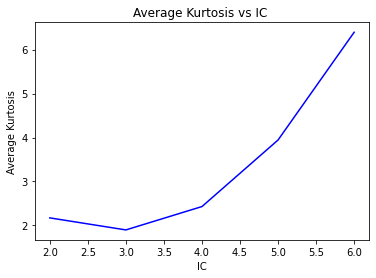

In [120]:
comp_kurt=[]
dims=range(2,len(scaled_data[0]))
print(scaled_data.shape)

for dim in dims:
        ica=FastICA(n_components=dim, max_iter=100000, tol=.01)  #use 1000 and .1 for sim data set
        ica_data = ica.fit_transform(scaled_data)   
        ica_data = pd.DataFrame(ica_data)
        temp=kurtosis(ica_data)
        kurt1=temp.sum()/len(temp)
        comp_kurt.append(kurt1)    
        

plt.figure()
plt.plot(dims, comp_kurt, 'blue')
plt.title("Average Kurtosis vs IC ")
plt.xlabel("IC")
plt.ylabel("Average Kurtosis")
plt.show()

In [141]:
dim=len(scaled_data[0])
ICA = FastICA(n_components=dim,max_iter=2000)
ica_data=ICA.fit_transform(scaled_data)
kurt = pd.DataFrame(kurtosis(ica_data, axis=0), columns=['Kurtosis'])
kurt

,Kurtosis
0,3.568529
1,3.859411
2,4.262173
3,3.286431
4,2.828883
...,...
95,4.120626
96,-0.935575
97,3.529537
98,2.601281


Text(0, 0.5, 'Second principle compoennt')

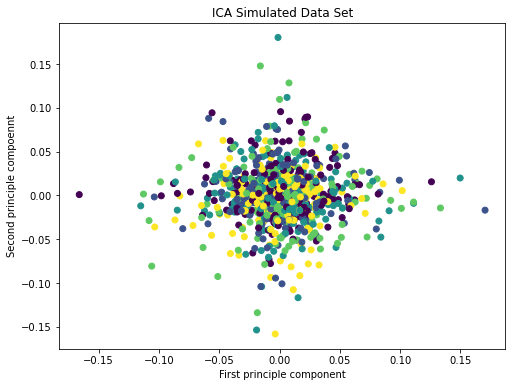

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(ica_data[:,0],ica_data[:,1],c=y)
plt.title('ICA Simulated Data Set')
plt.xlabel('First principle component')
plt.ylabel('Second principle compoennt')

In [48]:
dim=len(scaled_data[0])
dims=range(1,dim)
per_lost=[]
lost=0
for i in dims:
    ica = FastICA(n_components = i, max_iter=10,tol=.1)
    reduced = ica.fit_transform(scaled_data)
    recover = ica.inverse_transform(reduced)
    orig = pd.DataFrame(scaled_data)
    recovered = pd.DataFrame(recover)
    lost=round((1-np.var(recovered)/np.var(orig))*100, 2)
    lost=round(sum(lost),2)/dim
    per_lost.append((round(lost,2)))

print(per_lost)

[73.85, 49.01, 35.04, 22.72, 13.13, 5.07]


Text(0, 0.5, 'Dimensions after Left After Dimension Reduction')

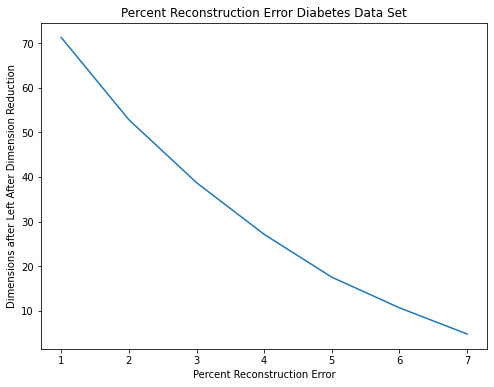

In [151]:
tit=[73.85, 49.01, 35.04, 22.72, 13.13, 5.07]
dia=[71.26, 52.82, 38.72, 27.13, 17.52, 10.66, 4.79]
sim=[4.68, 4.6, 4.52, 4.44, 4.36, 4.29, 4.21, 4.14, 4.07, 4.0, 3.93, 3.86, 3.79, 3.73, 3.66, 3.59, 3.53, 3.46, 3.4, 3.34, 3.28, 3.22, 3.15, 3.09, 3.03, 2.98, 2.92, 2.86, 2.8, 2.75, 2.69, 2.64, 2.58, 2.53, 2.47, 2.42, 2.37, 2.32, 2.26, 2.21, 2.16, 2.11, 2.06, 2.01, 1.97, 1.92, 1.87, 1.82, 1.78, 1.73, 1.68, 1.64, 1.59, 1.55, 1.5, 1.46, 1.42, 1.37, 1.33, 1.29, 1.25, 1.21, 1.17, 1.13, 1.09, 1.05, 1.01, 0.97, 0.94, 0.9, 0.86, 0.82, 0.79, 0.75, 0.72, 0.68, 0.65, 0.62, 0.58, 0.55, 0.52, 0.49, 0.46, 0.43, 0.4, 0.37, 0.34, 0.31, 0.28, 0.25, 0.22, 0.2, 0.17, 0.14, 0.12, 0.09, 0.07, 0.04, 0.02]

y_ax=dia
x_ax=range(1,len(y_ax)+1)

plt.figure(figsize=(8,6))
plt.plot(x_ax,y_ax)
plt.title('Percent Reconstruction Error Diabetes Data Set')
plt.xlabel('Percent Reconstruction Error')
plt.ylabel('Dimensions after Left After Dimension Reduction')


In [ ]:
#ran matrix

In [144]:
original_features=len(scaled_data[0])
new_features=2
R=np.random.normal(0,1/new_features,[original_features,new_features])
R_normed = normalize(R, axis=0, norm='l2')
ran_data=np.matmul(scaled_data,R_normed)

Text(0, 0.5, 'Second principle compoennt')

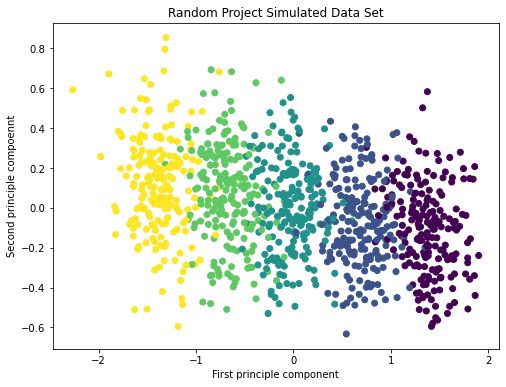

In [146]:
plt.figure(figsize=(8,6))
plt.scatter(ran_data[:,0],ran_data[:,1],c=y)
plt.title('Random Project Simulated Data Set')
plt.xlabel('First principle component')
plt.ylabel('Second principle compoennt')

In [ ]:
#Feature almaggeration

In [108]:
dim=len(scaled_data[0])
dims=range(1,dim)
per_lost=[]
lost=0
for i in dims:
    fa = FA(n_clusters = i)
    reduced = fa.fit_transform(scaled_data)
    recover = fa.inverse_transform(reduced)
    orig = pd.DataFrame(scaled_data)
    recovered = pd.DataFrame(recover)
    lost=round((1-np.var(recovered)/np.var(orig))*100, 2)
    lost=round(sum(lost),2)/dim
    per_lost.append((round(lost,2)))

print(per_lost)

[4.68, 4.61, 4.55, 4.49, 4.43, 4.37, 4.32, 4.26, 4.2, 4.15, 4.09, 4.04, 3.99, 3.93, 3.88, 3.83, 3.77, 3.72, 3.67, 3.62, 3.57, 3.52, 3.47, 3.42, 3.37, 3.32, 3.27, 3.22, 3.17, 3.12, 3.08, 3.03, 2.98, 2.93, 2.88, 2.83, 2.79, 2.74, 2.69, 2.64, 2.6, 2.55, 2.5, 2.46, 2.41, 2.36, 2.32, 2.27, 2.22, 2.18, 2.13, 2.09, 2.04, 2.0, 1.95, 1.91, 1.86, 1.82, 1.77, 1.73, 1.68, 1.64, 1.59, 1.55, 1.5, 1.46, 1.41, 1.37, 1.33, 1.28, 1.24, 1.19, 1.15, 1.11, 1.06, 1.02, 0.97, 0.93, 0.89, 0.84, 0.8, 0.76, 0.71, 0.67, 0.63, 0.58, 0.54, 0.5, 0.46, 0.41, 0.37, 0.33, 0.29, 0.25, 0.2, 0.16, 0.12, 0.08, 0.04]


Text(0.5, 0, 'Data Reduced to Dimension given by x-axis value')

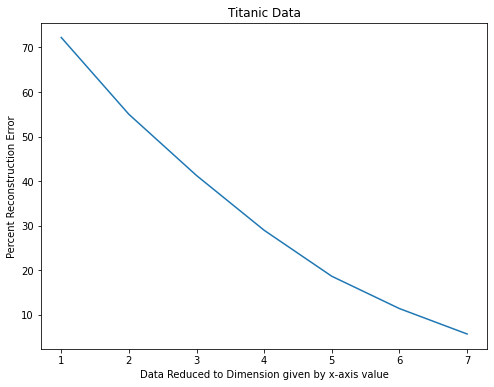

In [117]:
tit=[89.05, 66.38, 46.83, 32.7, 20.57, 8.81]
dia=[72.23, 54.99, 41.26, 28.97, 18.65, 11.4, 5.7]
sim=[4.68, 4.61, 4.55, 4.49, 4.43, 4.37, 4.32, 4.26, 4.2, 4.15, 4.09, 4.04, 3.99, 3.93, 3.88, 3.83, 3.77, 3.72, 3.67, 3.62, 3.57, 3.52, 3.47, 3.42, 3.37, 3.32, 3.27, 3.22, 3.17, 3.12, 3.08, 3.03, 2.98, 2.93, 2.88, 2.83, 2.79, 2.74, 2.69, 2.64, 2.6, 2.55, 2.5, 2.46, 2.41, 2.36, 2.32, 2.27, 2.22, 2.18, 2.13, 2.09, 2.04, 2.0, 1.95, 1.91, 1.86, 1.82, 1.77, 1.73, 1.68, 1.64, 1.59, 1.55, 1.5, 1.46, 1.41, 1.37, 1.33, 1.28, 1.24, 1.19, 1.15, 1.11, 1.06, 1.02, 0.97, 0.93, 0.89, 0.84, 0.8, 0.76, 0.71, 0.67, 0.63, 0.58, 0.54, 0.5, 0.46, 0.41, 0.37, 0.33, 0.29, 0.25, 0.2, 0.16, 0.12, 0.08, 0.04]

y_ax=dia
x_ax=range(1,len(y_ax)+1)

plt.figure(figsize=(8,6))
plt.plot(x_ax,y_ax)
plt.title('Titanic Data')
plt.ylabel('Percent Reconstruction Error')
plt.xlabel('Data Reduced to Dimension given by x-axis value')


Text(0, 0.5, 'Second principle compoennt')

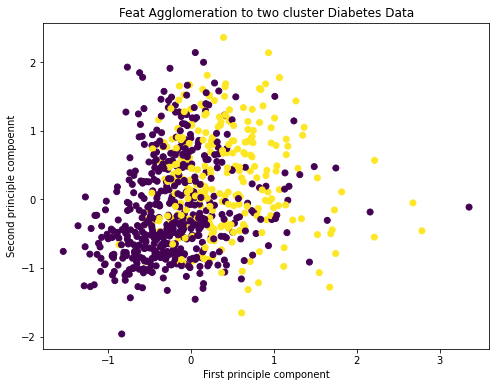

In [105]:
fa = FA(n_clusters = 2)
reduced = fa.fit_transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0],reduced[:,1],c=y)
plt.title("Feat Agglomeration to two cluster Diabetes Data")
plt.xlabel('First principle component')
plt.ylabel('Second principle compoennt')